### Challenge 1
#### Vanessa Vega Valdés

In [317]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
#%pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [318]:
pos = pd.read_csv('POS_data.csv')
pos

,Date,Time,Transaction,Item
0,10/30/2016,9:58:11,1,Bread
1,10/30/2016,10:05:34,2,Scandinavian
2,10/30/2016,10:05:34,2,Scandinavian
3,10/30/2016,10:07:57,3,Hot chocolate
4,10/30/2016,10:07:57,3,Jam
...,...,...,...,...
21288,4/9/2017,14:32:58,9682,Coffee
21289,4/9/2017,14:32:58,9682,Tea
21290,4/9/2017,14:57:06,9683,Coffee
21291,4/9/2017,14:57:06,9683,Pastry


In [319]:
pos['Time_stamp'] = pd.to_datetime(pos['Date'] + ' ' + pos['Time'])
pos.set_index('Time_stamp', inplace=True)

pos_2016 = pos[pos.index.year == 2016]
pos_2017 = pos[pos.index.year == 2017]

In [320]:
pos['Date'] = pd.to_datetime(pos['Date'])
pos

,Date,Time,Transaction,Item
Time_stamp,,,,
2016-10-30 09:58:11,2016-10-30,9:58:11,1,Bread
2016-10-30 10:05:34,2016-10-30,10:05:34,2,Scandinavian
2016-10-30 10:05:34,2016-10-30,10:05:34,2,Scandinavian
2016-10-30 10:07:57,2016-10-30,10:07:57,3,Hot chocolate
2016-10-30 10:07:57,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
2017-04-09 14:32:58,2017-04-09,14:32:58,9682,Coffee
2017-04-09 14:32:58,2017-04-09,14:32:58,9682,Tea
2017-04-09 14:57:06,2017-04-09,14:57:06,9683,Coffee


In [321]:
# How big is the dataset?
f"The dataset is composed by {format(pos.shape[1], ',')} columns and {format(pos.shape[0], ',')} rows."

'The dataset is composed by 4 columns and 21,293 rows.'

In [322]:
# What's the time range of the dataset?
total_days = (pos['Date'].max() - pos['Date'].min()).days
f"The dataset spans from {pos['Date'].min().strftime('%B %d, %Y')} to {pos['Date'].max().strftime('%B %d, %Y')}, a total of {total_days} days."

'The dataset spans from October 30, 2016 to April 09, 2017, a total of 161 days.'

In [323]:
# How many different Products do we have? 
f"We have {format(len(pos['Item'].unique()), ',')} different products, and {format(pos['Transaction'].max(), ',')} transactions in total."

'We have 95 different products, and 9,684 transactions in total.'

In [324]:
f'We have an average of {int(pos["Transaction"].max() / total_days):n} transactions per day, and every transaction has an average of {format(pos.shape[0] / pos["Transaction"].max(), ".2f")} items.'

'We have an average of 60 transactions per day, and every transaction has an average of 2.20 items.'

In [326]:
pos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21293 entries, 2016-10-30 09:58:11 to 2017-04-09 15:04:24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 831.8+ KB


In [325]:
pos.describe()

,Date,Transaction
count,21293,21293.000000
mean,2017-01-17 02:09:18.267975424,4951.990889
min,2016-10-30 00:00:00,1.000000
25%,2016-12-03 00:00:00,2548.000000
50%,2017-01-21 00:00:00,5067.000000
75%,2017-02-28 00:00:00,7329.000000
max,2017-04-09 00:00:00,9684.000000
std,NaN,2787.758400


In [327]:
pos.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

## Overall Look at Sales

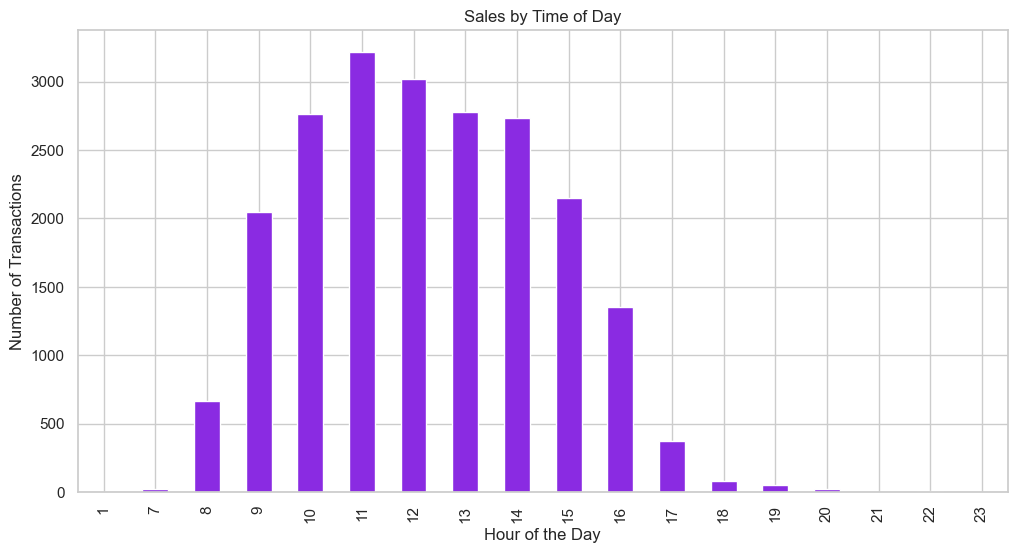

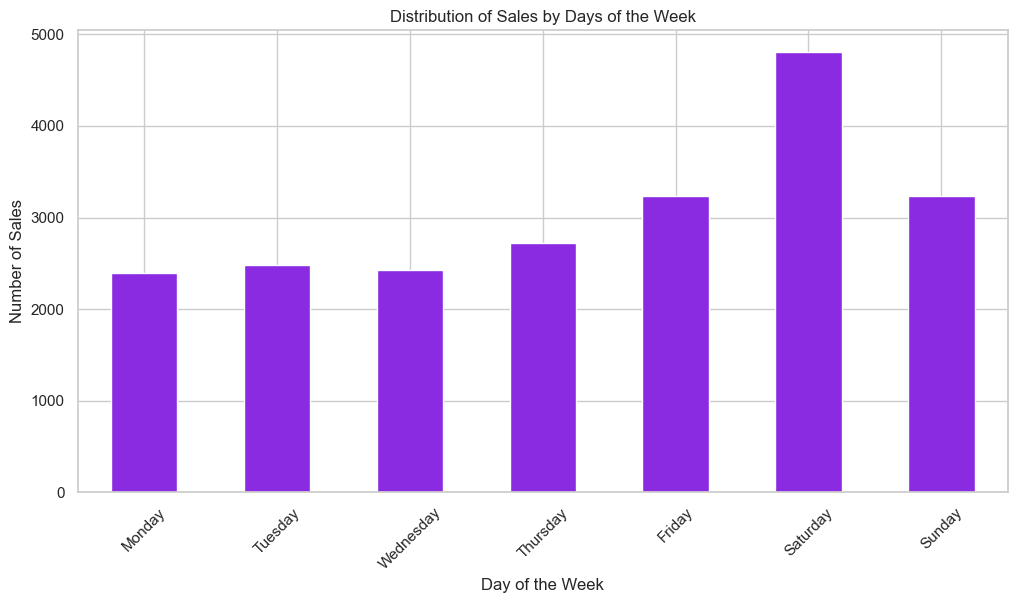

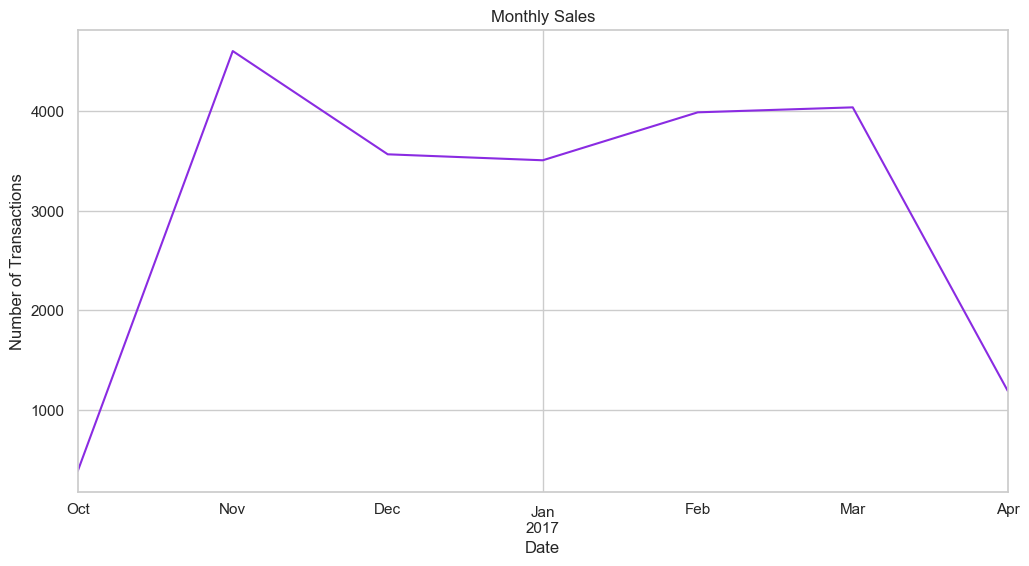

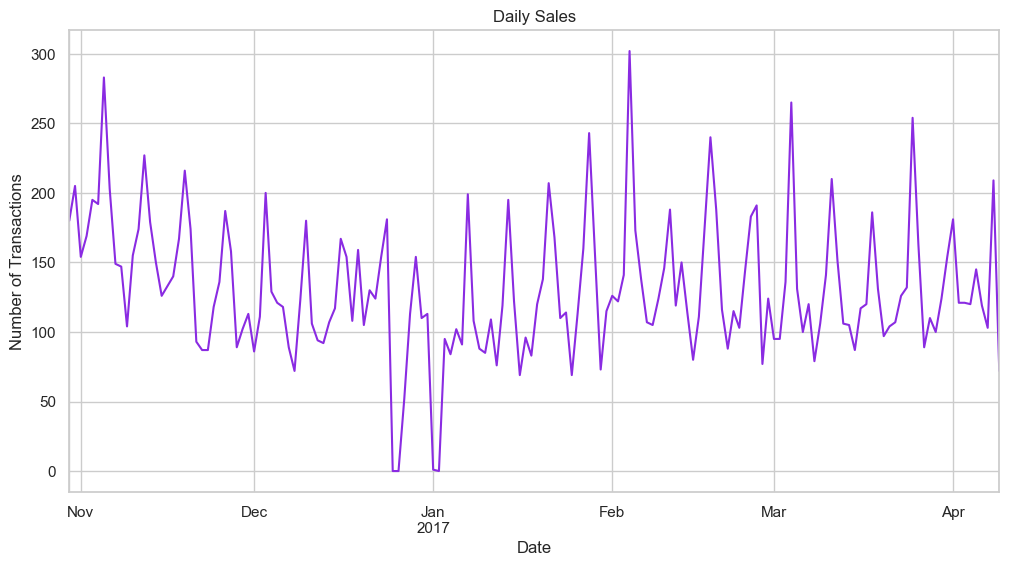

In [330]:
# Sales by time of day
plt.figure(figsize=(12, 6))
pos.groupby(pos.index.hour).size().plot(kind='bar', color='blueviolet')
plt.title('Sales by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.show()

# Sales by day of the week
pos['Day_of_Week'] = pos['Date'].dt.dayofweek

# Map numerical day of the week to actual names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
pos['Day_of_Week_Name'] = pos['Day_of_Week'].map(day_mapping)

# Count occurrences of each day of the week
sales_by_day = pos['Day_of_Week_Name'].value_counts().sort_index()

# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the distribution with specified day order
plt.figure(figsize=(12, 6))
sales_by_day.loc[day_order].plot(kind='bar', color='blueviolet')
plt.title('Distribution of Sales by Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

# Sales monthly
plt.figure(figsize=(12, 6))
pos.resample('M').size().plot(legend=False, color = 'blueviolet')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Sales daily
plt.figure(figsize=(12, 6))
pos.resample('D').size().plot(legend=False, color = 'blueviolet')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()



 * We can see a 12hr operating time frame from 8am to 8pm with a peak between 11am an 2pm.
 * During the week we see an increasing trend in sales towards the weekend with an important peak on Saturdays and an clear descent on Sundays.
 * As we do only have data for less than 6 months, we won't be able to compare YoY Sales, but we can see in out data the overall peak of the sample is in November, with a noticable decrease during December & January.
 * There is no clear trend for sales within the given time frame, it looks very stationary with a minor decrease around winter holidays.
 * We may also spot a couple outliers in December 2016 and January 2017, let's look at the dates involved.


In [269]:
daily_sales = pos.resample('D').size()

# Identify dates with 0 transactions
zero_transaction_dates = daily_sales[daily_sales == 0].index
pd.DataFrame(zero_transaction_dates)


,Time_stamp
0,2016-12-25
1,2016-12-26
2,2017-01-02


* Now we see these were non working days.

## Product Analysis

In [270]:
#How many times has each product been purchased?

item_tot = pos['Item'].value_counts().reset_index()
item_tot.columns = ['Item', 'Count']
item_tot


,Item,Count
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
...,...,...
90,Chicken sand,1
91,The BART,1
92,Adjustment,1
93,Olum & polenta,1


C:\Users\vanev\AppData\Local\Temp\ipykernel_25936\3194360235.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




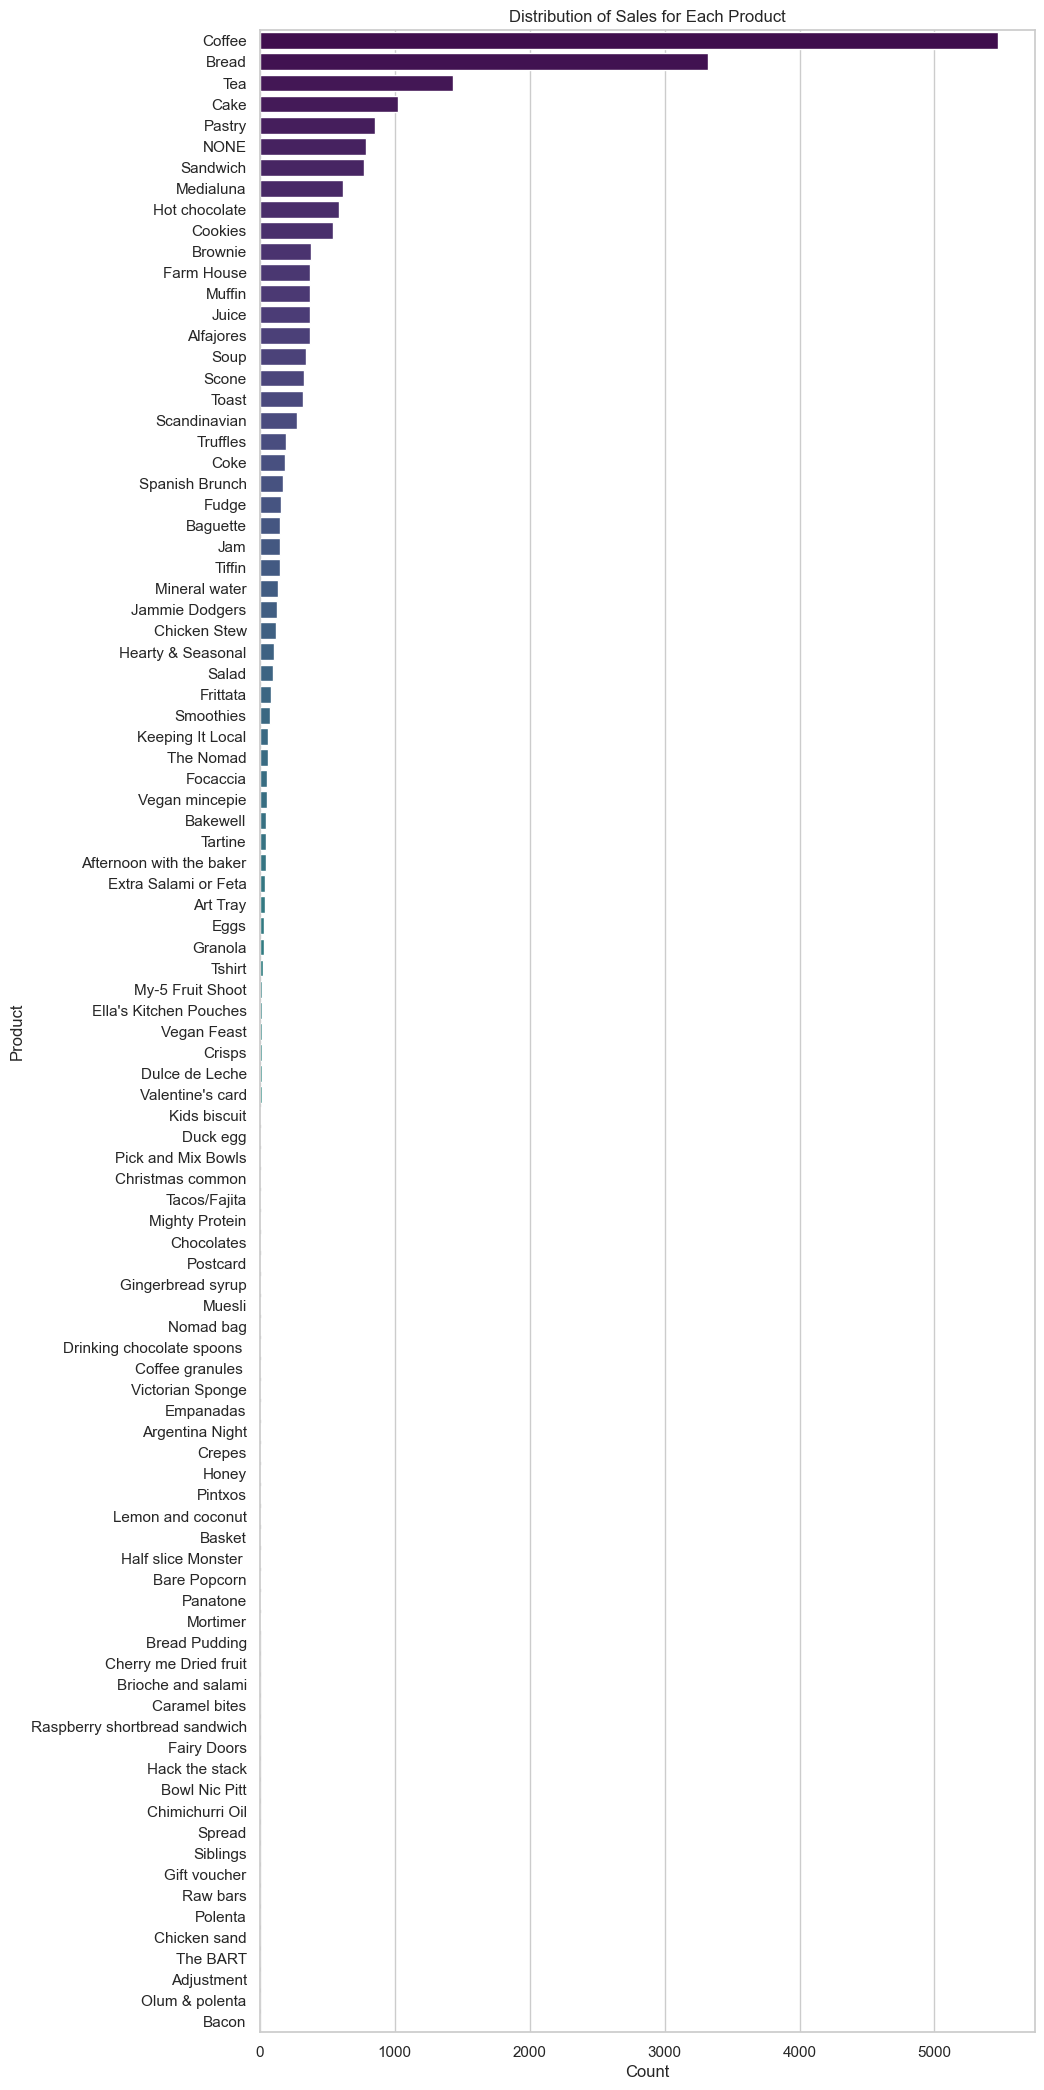

In [271]:
# Let's visualize how sales per product are distributed
sns.set(style="whitegrid")

plt.figure(figsize=(10, 26))
sns.barplot(x='Count', y='Item', data=item_tot, palette='viridis')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Product')
plt.title('Distribution of Sales for Each Product')

plt.show()

C:\Users\vanev\AppData\Local\Temp\ipykernel_25936\798058351.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




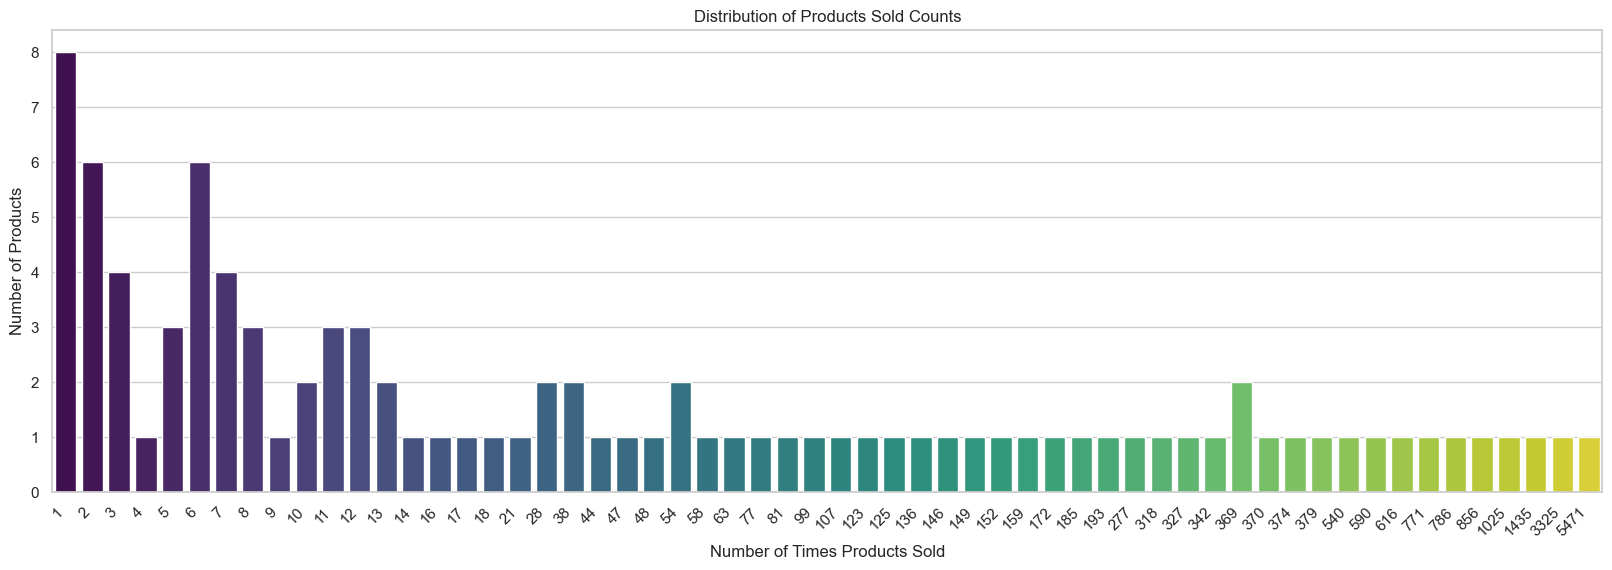

In [272]:
# So we can see that most of the products are sold less than 100 times, and only a few are sold more than 1000 times, let's look at that distribution.
times_sold = item_tot['Count'].unique()

# Count the number of products for each unique value
products_count_by_times_sold = item_tot['Count'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
sns.barplot(x=products_count_by_times_sold.index, y=products_count_by_times_sold.values, palette='viridis')

plt.xlabel('Number of Times Products Sold')
plt.ylabel('Number of Products')
plt.title('Distribution of Products Sold Counts')
plt.xticks(rotation=45, ha='right')

plt.show()

In [273]:
# We see 8 of our products were bought just 1 time. Let's see which products are those.
item_tot[item_tot['Count'] == 1]


,Item,Count
87,Gift voucher,1
88,Raw bars,1
89,Polenta,1
90,Chicken sand,1
91,The BART,1
92,Adjustment,1
93,Olum & polenta,1
94,Bacon,1


C:\Users\vanev\AppData\Local\Temp\ipykernel_25936\3507998318.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




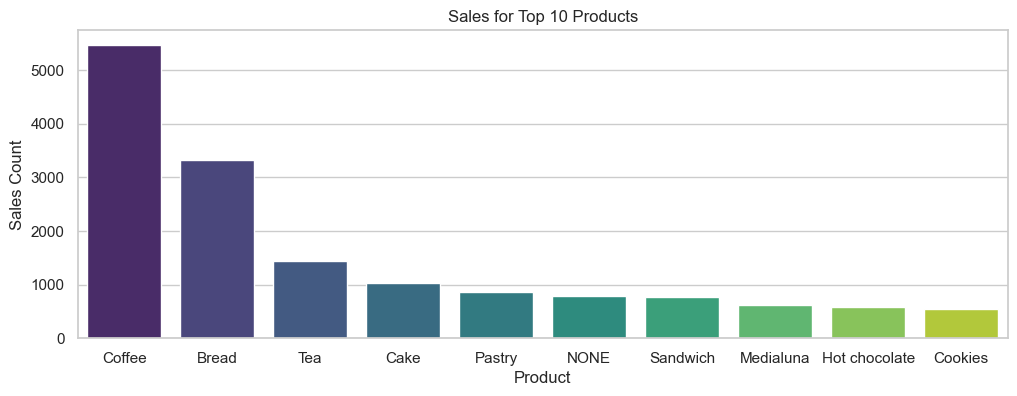

In [282]:
# Now, let's focus on the top 10 products sold.
top_10 = item_tot.head(10)

# Let's visualize how sales per product are distributed
sns.set(style="whitegrid")

plt.figure(figsize=(12,4))
sns.barplot(x='Item', y='Count', data=top_10, palette='viridis')

plt.xlabel('Product')
plt.ylabel('Sales Count')
plt.title('Sales for Top 10 Products')

plt.show()

* Let's look at which products are being sold during which hours of the day.

In [275]:

hourly_product_counts['Hour'] = hourly_product_counts.index

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
melted_df = pd.melt(hourly_product_counts.copy(), id_vars=['Hour'], var_name='Product', value_name='Count')

# Filter for the top 10 products
melted_df_top_10 = melted_df[melted_df['Product'].isin(top_10_products)]

# Define a color map for consistent coloring
color_map = {product: f'rgb{color}' for product, color in zip(top_10_products, sns.color_palette("viridis", n_colors=len(top_10_products)))}

# Plot the interactive stacked bar chart with plotly
stack = px.bar(melted_df_top_10, x='Hour', y='Count', color='Product',
               title='Top 10 Product Sales per Hour of the Day',
               labels={'Count': 'Number of Transactions', 'Hour': 'Hour of the Day'},
               hover_data=['Product', 'Count'],
               color_discrete_map=color_map,  # Use the color map here
               height=600, width=1500)

# Show the plot
stack.show()

# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
melted_df_top_10 = melted_df_top_10.copy()

# Calculate the percentage of each product's contribution to total sales per hour
melted_df_top_10['Percentage'] = melted_df_top_10.groupby('Hour')['Count'].transform(lambda x: (x / x.sum()) * 100)

# Plot the full stacked bar chart with percentages using plotly
full_stack = px.bar(melted_df_top_10, x='Hour', y='Percentage', color='Product',
                    title='Full Stacked Bar Chart with Percentages',
                    labels={'Percentage': 'Percentage of Total Sales', 'Hour': 'Hour of the Day'},
                    hover_data=['Product', 'Count'],
                    color_discrete_map=color_map,  # Use the same color map here
                    height=600, width=1500)  # Adjust height and width as needed

# Show the plot
full_stack.show()


* Looks like Coffee is the most popular product throughout every hour of the day, followed by Bread and Tea.
* As we can see, coffee acounts for the largest percentage of sales along all hours of the day.
* Coffee represents an outstanding 54% of sales at 7:00 AM, when people likely run to the market to get their dose of coffee for the day.
* On the other hand for cake, we interestingly see how its percentage increases during the afternoon, with people probably getting desserts for dinner time.
* Bread also has a clear peak during morning hours, but salesare pretty steady throughout the day with no dramatic increase or decreases.
* Medialunas and pastries are commonly eaten with coffee or tea are mainly both either at early morning or late at night, which are the hours when one would normally crave these. 
* Tea has an increasing patricipation in sales throught the day, but quantities are pretty stable overal.

**Next, it could be intersting to know which products are mostly sold per day of the week** 

In [295]:
# Filter for the top 10 products
top_10_products = top_10['Item'].tolist()
pos_top_10 = pos[pos['Item'].isin(top_10_products)]

# Count occurrences of each top 10 product per day of the week
sales_by_day_top_10 = pos_top_10.groupby(['Day_of_Week_Name', 'Item']).size().unstack(fill_value=0)

# Melt the DataFrame for Plotly
melted_df_top_10 = sales_by_day_top_10.reset_index().melt(id_vars='Day_of_Week_Name', var_name='Product', value_name='Count')

# Calculate the percentage of each product from the total sales per day
melted_df_top_10['Percentage'] = melted_df_top_10.groupby('Day_of_Week_Name')['Count'].transform(lambda x: x / x.sum() * 100)

# Define color map using Viridis
color_map = px.colors.sequential.Viridis

# Set the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the fully stacked bar chart with Plotly
weekly_stack = px.bar(melted_df_top_10, x='Day_of_Week_Name', y='Count', color='Product',
                           title='Top 10 Product Sales per Day of the Week (Quantity Distribution)',
                           labels={'Count': 'Number of Transactions', 'Day_of_Week_Name': 'Day of the Week'},
                           color_discrete_map=dict(zip(top_10_products, color_map)),
                           category_orders={'Day_of_Week_Name': day_order},  # Set the order of days
                           height=600, width=1500)

# Show the fully stacked plot
weekly_stack.show()

# Plot the percentage distribution
weekly_fullstack = px.bar(melted_df_top_10, x='Day_of_Week_Name', y='Percentage', color='Product',
                                title='Top 10 Product Sales per Day of the Week (Percentage Distribution)',
                                labels={'Percentage': 'Percentage of Total Sales', 'Day_of_Week_Name': 'Day of the Week'},
                                color_discrete_map=dict(zip(top_10_products, color_map)),
                                category_orders={'Day_of_Week_Name': day_order},  # Set the order of days
                                height=600, width=1500)

# Show the percentage plot
weekly_fullstack.show()


In [276]:
# Now we'll see what share of the total sales each product represents.

# Let's group everything not in the top 10 into "others"
pos['Item_grouped'] = pos['Item'].apply(lambda x: x if x in top_10['Item'].tolist() else 'Others')

# Calculate percentage of total purchases for each product
product_percentage = pos['Item_grouped'].value_counts(normalize=True) * 100

# Create a DataFrame for the treemap
treemap_data = pd.DataFrame({'Product': product_percentage.index, 'Percentage': product_percentage.values})

# Plot the treemap with customized size, color scale, and color range
treemap = px.treemap(treemap_data, 
                 path=['Product'], 
                 values='Percentage', 
                 title='Percentage of Total Purchases by Product',
                 width=1200,
                 height=600,
                 color='Percentage',  # Color based on percentage
                 color_continuous_scale='viridis')

treemap.show()

## Basket Relationship Analysis (Apriori Algorithm)  

In the following analysis we will be able to see a matrix with the different relationships within products in a same transaction, we will see the following fields:

* **Antecedents**:  The items that appear together in the antecedent part of the rule.
* **Consequents**:  The items that appear together in the consequent part of the rule.
* **Antecedent Support**: The proportion of transactions that contain the antecedent item.
* **Consequent Support**: The proportion of transactions that contain the consequent item.
* **Support**:      The support of the itemset, which is the proportion of transactions that contain both the antecedent and consequent.
* **Confidence**:   The confidence of the rule, which is the probability of the consequent given the antecedent.
* **Lift**:         The lift of the rule, which measures how much more likely the consequent is, given the antecedent, compared to its likelihood without the antecedent. A value greater than 1 indicates that the presence of the antecedent increases the likelihood of the consequent.
* **Leverage**: Leverage measures the difference in the support of both antecedent and consequent appearing together in transactions compared to what would be expected if they were independent.
* **Coviction**: Conviction is another measure of the strength of the rule. A high conviction value means that the consequent is highly dependent on the antecedent.
* **Zhangs Metric**: This metric measures interestigness. It ains to capture the dependency between the antecedent and the consequent in a rule. If the value is close to 0, it suggests that items are independent, if it is a positive value, it suggests the occurance of one, increases likelihood of the other and viceversa for negative values.

C:\Users\vanev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



        antecedents consequents  antecedent support  consequent support  \
0          (Coffee)     (Bread)            0.475081            0.324940   
1           (Bread)    (Coffee)            0.324940            0.475081   
2          (Pastry)     (Bread)            0.085510            0.324940   
3             (Tea)     (Bread)            0.141643            0.324940   
4            (Cake)    (Coffee)            0.103137            0.475081   
5         (Cookies)    (Coffee)            0.054034            0.475081   
6   (Hot chocolate)    (Coffee)            0.057916            0.475081   
7       (Medialuna)    (Coffee)            0.061379            0.475081   
8            (NONE)    (Coffee)            0.079005            0.475081   
9          (Pastry)    (Coffee)            0.085510            0.475081   
10       (Sandwich)    (Coffee)            0.071346            0.475081   
11            (Tea)    (Coffee)            0.141643            0.475081   

     support  confidence

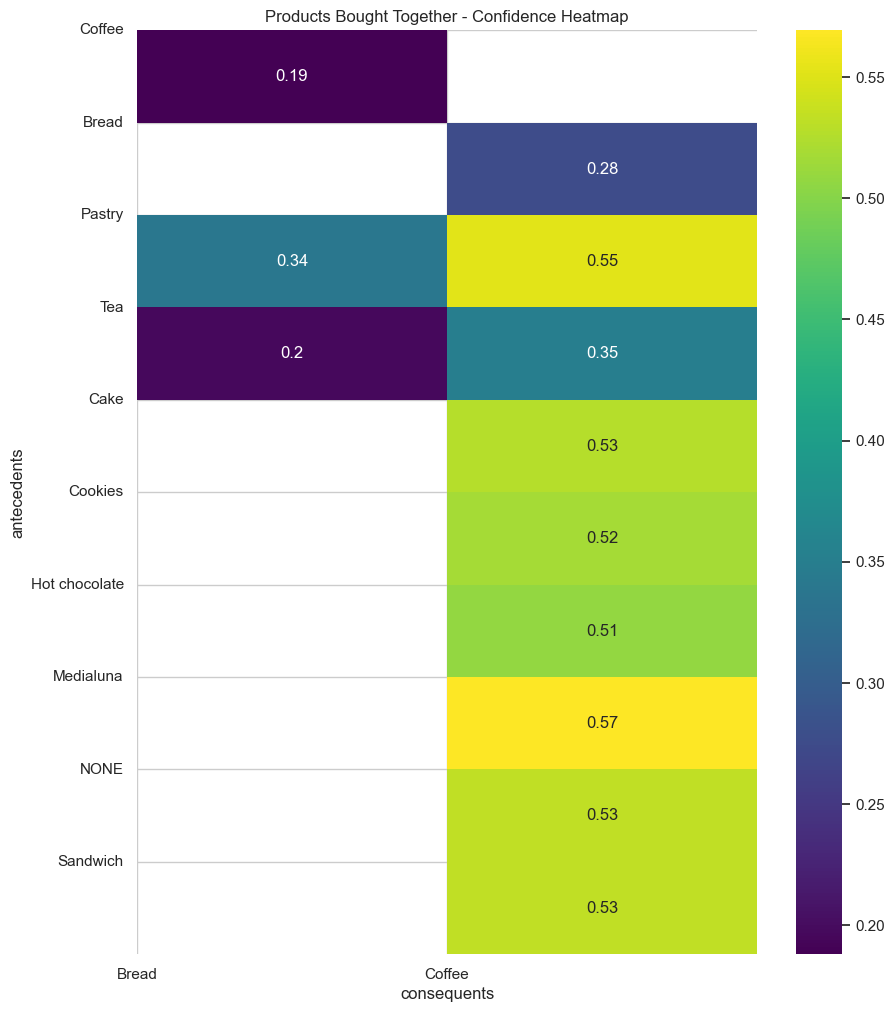

In [315]:
basket = pos.groupby(['Transaction', 'Item']).size().unstack(fill_value=0)

# Convert counts to binary values as we don't need to know how many times a product appears per transaction in this analysis
basket[basket > 1] = 1

# Apply Apriori algorithm to generate association rules
frequent_itemsets = apriori(basket, min_support=0.025, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.15)

# Display association rules
print(rules)

# Now we will create a matrix of product pairs and their confidence values
product_matrix = rules.pivot(index='antecedents', columns='consequents', values='confidence')

plt.figure(figsize=(10, 12))
sns.heatmap(product_matrix, annot=True, cmap="viridis", cbar=True)

plt.xticks(range(len(product_matrix.columns)), [', '.join(map(str, col)) for col in product_matrix.columns], rotation=0, ha='center')
plt.yticks(range(len(product_matrix.index)), [', '.join(map(str, index)) for index in product_matrix.index], rotation=0, va='center')

plt.title('Products Bought Together - Confidence Heatmap')
plt.show()



* In this heatmap we can see the probability of buying a product given that another product was bought. 
* For example, we can observe here that if a customer buys a Medialuna, there is a 57% probability that they will buy a coffee as well.
* For this dataset, Coffee is indeed the product with highest sales, as it appears in 25% of the transactions, so therefore it is the one with the most probability of being bought together with other products.
* We can also see a couple noticable relations with Bread being commonly bought together Tea, Pastries and Coffee.
* Interestingly, when buying Pastries we get a 34% probability of getting Bread as well, and a 55% probability of getting a coffe. As for Tea we get a 20% and a 35% probabilities respectively for also buying Bread and Coffee.
* The Bread-Coffee relation is different by the order of the products, so if we get Coffee first, there is a 19% of probability that we get Bread as well, but when Bread is our Antecedent, we get a 28% probability of getting Coffee in the same transaction. 

C:\Users\vanev\AppData\Local\Temp\ipykernel_25936\3606137671.py:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



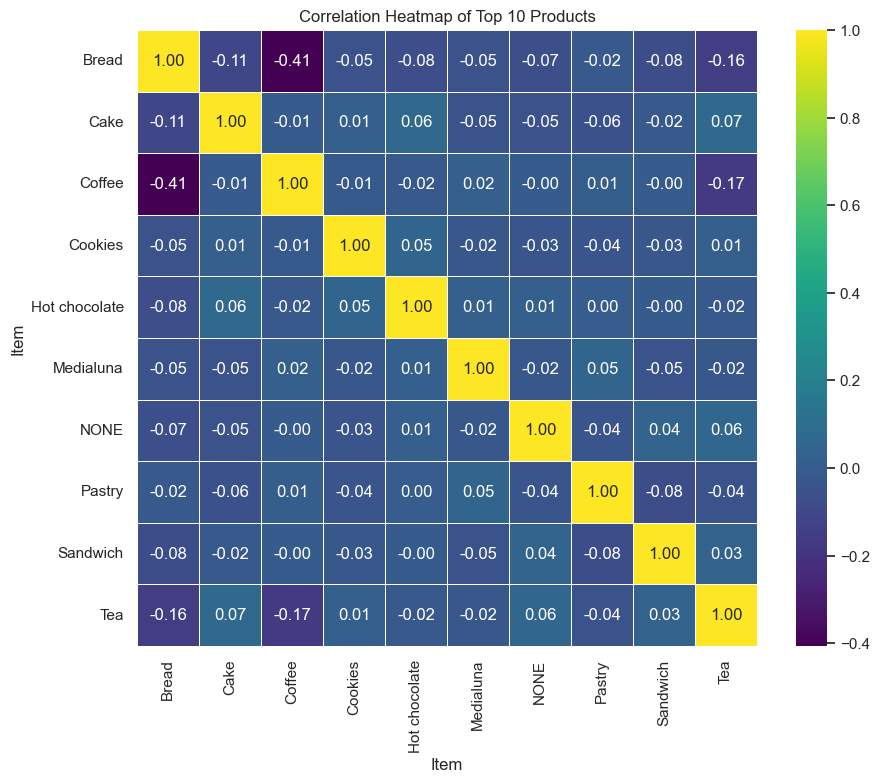

In [281]:
# Let's see a heatmap of the top 10 products and their correlation to see if there's anything we missed before.

top_10_index = pos['Item'].value_counts().nlargest(10).index

# Filtering the DataFrame to include only transactions with top 10 products
top_10_pos = pos[pos['Item'].isin(top_10_index)]

# Create a binary matrix indicating whether each product is present in a transaction
binary_matrix = pd.crosstab(top_10_pos['Transaction'], top_10_pos['Item']).applymap(lambda x: 1 if x > 0 else 0)

# Create a correlation matrix
correlation_matrix = binary_matrix.corr()

# Step 5: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Top 10 Products')
plt.show()


* As we saw in the previous heatmap, no surprises, the only relevant correlation can be observed between Coffee and Bread, probably related to these two products being the ones with the most transactions in the dataset.